In [1]:
from __future__ import print_function

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from __future__ import division
pd.set_option('display.width',5000)

In [3]:
df = pd.read_pickle('1026_data_for_modeling.csv')

In [4]:
df.head()

,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,...,binned_previous_10,binned_previous_15,binned_previous_20,binned_previous_25,binned_previous_30,binned_previous_35,binned_previous_40,binned_previous_45,binned_previous_50,binned_previous_55
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(43193, 84)

In [8]:
df.columns

Index(['job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes', 'binned_age_20', 'binned_age_30', 'binned_age_40', 'binned_age_50', 'binned_age_60', 'binned_age_70', 'binned_age_80', 'binned_age_90', 'binned_balance_-5000', 'binned_balance_0', 'binned_balance_5000', 'binned_balance_10000', 'binned_balance_15000', 'binned_balance_20000', 'binned_balance_25000', 'binned_balance_30000', 'binned_balance_35000', 'binned_balance_40000', 'binned_balance_45000', 'binned_balance_50000', 'binned_balance_55000', 'binned_balance_60000', 'binned_balance_65000', 'binned_balance_70000', 'binned_balance_75000', 'binned_balance_80000', 'binned_balance_85000', 'binned_balance_9

In [5]:
#check how many 0 and 1 value, the two class is a bit imbalance
df['y_yes'].value_counts()

0    38172
1     5021
Name: y_yes, dtype: int64

In [9]:
X = df.drop(['y_yes'], axis  = 1)

In [10]:
X.shape

(43193, 83)

In [11]:
y = df['y_yes']

In [12]:
#split the data, also since the two class is imbalance, make sure the train and test is splited evently.
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state=0) #80/20 split

In [13]:
x_train.shape

(34554, 83)

In [14]:
y_train.shape

(34554,)

Frist try logistic regression.

In [17]:
#use grid search to get the optimized regularization of C, use different scoring system, frist try
#accuracy as scoring. Use class_weight as balance to minimize the effect of imbalance class.

model = LogisticRegression(solver='liblinear',class_weight = 'balanced')
c_range = list(np.logspace(-3, 1, 256))
param_grid = dict(C=c_range)
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=True)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:  2.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.001036779197060366, 0.001074911103457137, 0.0011144454707535626, 0.00115543388033544, 0.0011979298107105216, 0.0012419887072831308, 0.001287668054695046, 0.0013350274518270132, 0.0013841286895587572, 0.0014350358313889448, 0.0014878152970202849, 0.0015425359490188223, 0.00...8.347734492114153, 8.654757464007233, 8.973072494285637, 9.303094895789918, 9.64525525623346, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [18]:
#use accuray as standard to find best C value
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

LogisticRegression(C=0.3604647033595959, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
{'C': 0.3604647033595959}
0.719453608844128


In [19]:
#use roc_auc as scoring metrics to run the grid
from sklearn.metrics import roc_auc_score

In [20]:
model_1 = LogisticRegression(solver='liblinear',class_weight = 'balanced')
c_range = list(np.logspace(-3, 1, 256))
param_grid = dict(C=c_range)
grid_1 = GridSearchCV(model_1, param_grid, cv=10, scoring='roc_auc', n_jobs=-1, verbose=True)
grid_1.fit(x_train, y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:  3.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.001036779197060366, 0.001074911103457137, 0.0011144454707535626, 0.00115543388033544, 0.0011979298107105216, 0.0012419887072831308, 0.001287668054695046, 0.0013350274518270132, 0.0013841286895587572, 0.0014350358313889448, 0.0014878152970202849, 0.0015425359490188223, 0.00...8.347734492114153, 8.654757464007233, 8.973072494285637, 9.303094895789918, 9.64525525623346, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [21]:
print(grid_1.best_estimator_)
print(grid_1.best_params_)
print(grid_1.best_score_)

LogisticRegression(C=0.13111339374215644, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
{'C': 0.13111339374215644}
0.7455220610894518


Now we have some preliminary idea of what C is, we can use that as a base model to do recursive feature eliminations.
Originally has about 80 features, try 20, 40, 60, 80 to see when the performace of the model plateus. 

In [30]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression(C=0.13111339374215644, solver='liblinear', class_weight = 'balanced')
selector_20 = RFE(estimator, 20, step=1)
selector_20.fit(x_train, y_train)


RFE(estimator=LogisticRegression(C=0.13111339374215644, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [31]:
#Reduce X to the selected features and then return the score of the underlying estimator.
print (selector_20.score(x_train, y_train))

0.6946229090698617


In [32]:
estimator = LogisticRegression(C=0.13111339374215644, solver='liblinear', class_weight = 'balanced')
selector_40 = RFE(estimator, 40, step=1)
selector_40.fit(x_train, y_train)
print (selector_40.score(x_train, y_train))

0.7189037448631128


In [34]:
estimator = LogisticRegression(C=0.13111339374215644, solver='liblinear', class_weight = 'balanced')
selector_60 = RFE(estimator, 60, step=1)
selector_60.fit(x_train, y_train)
print (selector_60.score(x_train, y_train))

0.7218267060253516


In [35]:
estimator = LogisticRegression(C=0.13111339374215644, solver='liblinear', class_weight = 'balanced')
selector_80 = RFE(estimator, 80, step=1)
selector_80.fit(x_train, y_train)
print (selector_80.score(x_train, y_train))

0.7226949123111651


In [36]:
x_train_60 = selector_60.transform(x_train)

In [37]:
model_logistic = LogisticRegression(C=0.13111339374215644, solver='liblinear', class_weight = 'balanced')
model_logistic.fit(x_train_60, y_train)

LogisticRegression(C=0.13111339374215644, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The change of score after 40 features is very small, we will just pick 60 features. 


In [40]:
from sklearn.metrics import roc_curve, auc

In [38]:
def GetAUCScore(model,x,y):
    score = model.predict_proba(x)[:,1]
    fpr, tpr, threshold = roc_curve(y, score)
    roc_auc = auc(fpr, tpr)
    

    plt.figure()
    plt.plot([0,1],[0,1])
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    return roc_auc

0.7488023462259397

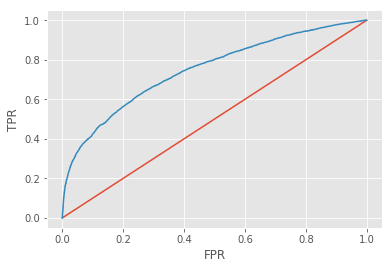

In [41]:
GetAUCScore(model_logistic, x_train_60, y_train)

In [42]:
x_test_60 = selector_60.transform(x_test)

0.746650920874459

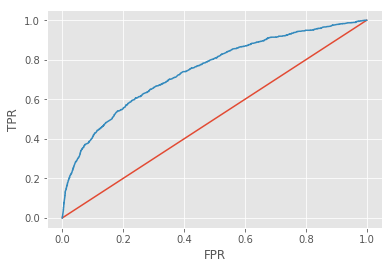

In [43]:
GetAUCScore(model_logistic, x_test_60, y_test)

Try naive bayes.

In [44]:
#naive bayes will not be affected by class weight imbalance, so no need to worry about that.
#Amoung the different model, MultinomialNB works the best.
#Coulde potentially run RFE again, but Naive bayes is very fast so not necessary.

model_bayes = naive_bayes.MultinomialNB()
model_bayes.fit(x_train, y_train)

print("Accuracy: %.3f"% accuracy_score(y_test, model_bayes.predict(x_test)))
print(classification_report(y_test, model_bayes.predict(x_test)))

Accuracy: 0.881
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7635
           1       0.48      0.23      0.31      1004

   micro avg       0.88      0.88      0.88      8639
   macro avg       0.69      0.60      0.62      8639
weighted avg       0.86      0.88      0.86      8639



0.7286038556970547

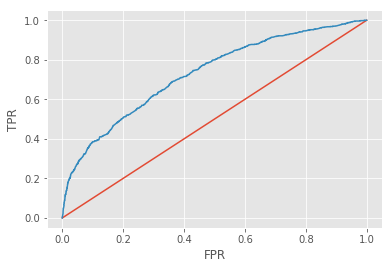

In [45]:
GetAUCScore(model_bayes, x_test, y_test)

Try random forest. Use grid search to find out the hyperparameters. First try more extreme values for grid search then narrow down the range. Here just show the last optimization.


In [49]:
from sklearn.model_selection import RandomizedSearchCV

#number of trees
n_estimators = [350]
# Number of features to consider at every split
max_features = np.arange (5,80,10)
# Maximum number of levels in tree
max_depth = np.arange (5,100,10)
# Minimum number of samples required to split a node
min_samples_split = [150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [120, 150, 200]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

random_grid


{'n_estimators': [350],
 'max_features': array([ 5, 15, 25, 35, 45, 55, 65, 75]),
 'max_depth': array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95]),
 'min_samples_split': [150],
 'min_samples_leaf': [120, 150, 200],
 'bootstrap': [True]}

In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
randomforest = RandomForestClassifier(class_weight='balanced')
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=randomforest, param_distributions=random_grid,
                              n_iter = 50, scoring='roc_auc', 
                              cv = 3, verbose=20, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [350], 'max_features': array([ 5, 15, 25, 35, 45, 55, 65, 75]), 'max_depth': array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95]), 'min_samples_split': [150], 'min_samples_leaf': [120, 150, 200], 'bootstrap': [True]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=20)

In [51]:
rf_random.best_params_

{'n_estimators': 350,
 'min_samples_split': 150,
 'min_samples_leaf': 120,
 'max_features': 25,
 'max_depth': 65,
 'bootstrap': True}

In [98]:
randomforest = RandomForestClassifier(class_weight = 'balanced', n_estimators=350, min_samples_split = 150,
                                     min_samples_leaf = 120, max_features = 25, max_depth = 65, bootstrap = True )

randomforest.fit(x_train_60, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=65, max_features=25,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=120,
            min_samples_split=150, min_weight_fraction_leaf=0.0,
            n_estimators=350, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

0.75957287220768

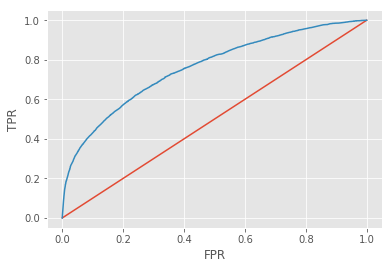

In [99]:
GetAUCScore(randomforest, x_train_60, y_train)

0.746942028872069

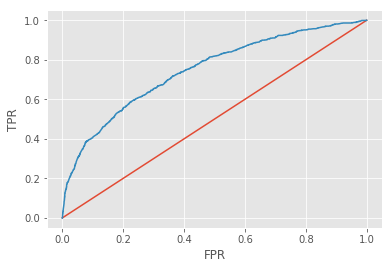

In [100]:
GetAUCScore(randomforest, x_test_60, y_test)

Try SVM, use grid search to find out the hyperparameters.

In [ ]:
#use grid search to find out the optimal C and gamma
def svc_param_selection(x_train, y_train, nfolds):
    Cs = np.logspace(-2, -1, 5)
    gammas = np.logspace(-2, -1, 5)
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf', class_weight = 'balanced'), param_grid, cv=nfolds, scoring='roc_auc', verbose = 20)
    grid_search.fit(x_train,y_train )
    grid_search.best_params_
    return grid_search.best_params_


In [ ]:
svc_param_selection(x_train, y_train, 3)

In [55]:
#use the result from the grid search
model_svm = svm.SVC(kernel='rbf', class_weight = 'balanced', C = 0.1, gamma=0.03162277660168379 )

In [56]:
model_svm.fit(x_train, y_train)

SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03162277660168379,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [57]:
from sklearn.metrics import roc_auc_score
#train score
y_predic_train_svm = model_svm.predict(x_train)
train_score_svm = roc_auc_score(y_train,y_predic_train_svm)
print (train_score_svm)
#test score
y_predic_test_svm = model_svm.predict(x_test)
test_score_svm = roc_auc_score(y_test,y_predic_test_svm)
print (test_score_svm)

0.6853058409804309
0.6797570034205027


In [75]:
K.clear_session()

In [76]:
from keras import models, layers, callbacks
from keras.utils import np_utils
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [77]:
from keras.models import Sequential
from keras.layers import Dense

In [59]:
#this is use grid search to find out batch size, actually is not very necessary in this application.
#use callback list to regularize and modify the structure of the neural net. 

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=60, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(Dense(16, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
# seed = 7
# numpy.random.seed(seed)
# # load dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, verbose=20)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

# summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
exception calling callback for <Future at 0x1c2c303278 state=finished raised BrokenProcessPool>
sklearn.externals.joblib.externals.loky.process_executor._RemoteTraceback: 
'''
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py", line 393, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/anaconda3/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'create_model' on <module 'sklearn.externals.joblib.externals.loky.backend.popen_loky_posix' from '/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/ext

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [72]:
#since neural net did not have an option for class weight balance, I use radom resampling to balance out the class.
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_train_60_resampled, y_train_resampled = ros.fit_resample(x_train_60, y_train)


In [73]:
x_train_60_resampled.shape

(61074, 60)

In [67]:
callbacks_list = [
        callbacks.EarlyStopping(
        monitor='acc',
        patience=1),
    
        callbacks.ModelCheckpoint(
        filepath='my_model.h5',
        monitor='val_loss',
        save_best_only=True),
    
        callbacks.TensorBoard(
        log_dir='my_log_dir',
        histogram_freq=1,)
]

In [79]:
#things to tune: 1. how many layers; 2. how many nodes each layer, 3. activation for each layer 4. optimizer 5. metrics
# 6. patience in callback list, 7.batch size
#This is the most optimized model after many trials

model_neural_net_1 = Sequential()
model_neural_net_1.add(Dense(30, input_dim=60, activation='relu'))
model_neural_net_1.add(layers.Dropout(0.2))

model_neural_net_1.add(Dense(15, activation='relu'))
model_neural_net_1.add(layers.Dropout(0.2))

model_neural_net_1.add(Dense(5, activation='relu'))
model_neural_net_1.add(layers.Dropout(0.2))

model_neural_net_1.add(Dense(1, activation='sigmoid'))
model_neural_net_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

result = model_neural_net_1.fit(x_train_60_resampled, y_train_resampled, epochs=100, batch_size = 100, 
                   validation_split=0.1, callbacks=callbacks_list)

Train on 54966 samples, validate on 6108 samples
Epoch 1/100
54966/54966 [==============================] - 1s 21us/step - loss: 0.6268 - acc: 0.6519 - val_loss: 0.6631 - val_acc: 0.5080
Epoch 2/100
54966/54966 [==============================] - 1s 17us/step - loss: 0.5961 - acc: 0.6920 - val_loss: 0.6605 - val_acc: 0.5300
Epoch 3/100
54966/54966 [==============================] - 1s 15us/step - loss: 0.5917 - acc: 0.6933 - val_loss: 0.6579 - val_acc: 0.5493
Epoch 4/100
54966/54966 [==============================] - 1s 15us/step - loss: 0.5874 - acc: 0.6956 - val_loss: 0.6809 - val_acc: 0.5054
Epoch 5/100
54966/54966 [==============================] - 1s 15us/step - loss: 0.5852 - acc: 0.6969 - val_loss: 0.6621 - val_acc: 0.5306
Epoch 6/100
54966/54966 [==============================] - 1s 15us/step - loss: 0.5815 - acc: 0.6984 - val_loss: 0.6807 - val_acc: 0.5246
Epoch 7/100
54966/54966 [==============================] - 1s 14us/step - loss: 0.5824 - acc: 0.7001 - val_loss: 0.6327 - v

In [69]:
def GetAUCScore_neural_net(model,x,y):
    score = model.predict_proba(x)
    fpr, tpr, threshold = roc_curve(y, score)
    roc_auc = auc(fpr, tpr)
    

    plt.figure()
    plt.plot([0,1],[0,1])
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    return roc_auc


0.7686724353677088

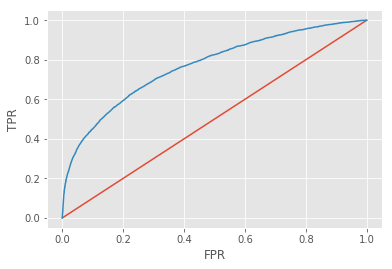

In [80]:
GetAUCScore_neural_net(model_neural_net_1, x_train_60_resampled,y_train_resampled)

0.7473613731061347

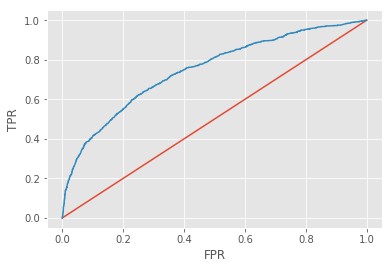

In [81]:
GetAUCScore_neural_net(model_neural_net_1, x_test_60, y_test)

In [ ]:
#At this point, it is helpful to see what mistake the model is making by analyzing true positive and false negative.


In [83]:
#first need to pick a threshold, then update the prediction based on the threshold
score = model_neural_net_1.predict_proba(x_test_60)
fpr, tpr, threshold = roc_curve(y_test, score)
best_index = 0
value = 1000
for i in range (len(fpr)):
    current_val = abs(1-tpr[i] -fpr[i])
    if current_val < value:
        value = current_val
        best_index = i

update_threshold = threshold[best_index]
print ('update_threshold', update_threshold)
y_predic = []
for num in score:
    if num >= update_threshold:
        y_predic.append(1)
    else:
        y_predic.append(0)

update_threshold 0.36455876


In [84]:
y_predic

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,


In [85]:
False_negative_index = []
for index, num in enumerate (y_test):
    
    if (num == 1) and (num != y_predic[index]):
        False_negative_index.append(index)

In [89]:
True_positive_index = []
for index, num in enumerate (y_test):
    
    if (num == 1) and (num == y_predic[index]):
        True_positive_index.append(index)

In [91]:
x_test_60_df = x_test[x_test.columns[selector_60.support_]]

In [92]:
x_test_60_df.head()

,job_housemaid,job_management,job_retired,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,...,binned_campaign_45,binned_previous_0,binned_previous_5,binned_previous_10,binned_previous_15,binned_previous_20,binned_previous_25,binned_previous_35,binned_previous_50,binned_previous_55
2371,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3134,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11869,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25947,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
29113,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
True_positive = x_test_60_df.iloc[True_positive_index,:]
True_positive_sum = pd.DataFrame(True_positive).sum()
True_positive_sum

job_housemaid             10
job_management           265
job_retired               80
job_services              39
job_student               38
job_technician           106
job_unemployed            45
marital_married          286
marital_single           310
education_secondary      321
education_tertiary       296
default_yes                3
housing_yes              137
loan_yes                  24
contact_telephone         49
contact_unknown            5
poutcome_other            48
poutcome_success         167
poutcome_unknown         395
binned_age_20            191
binned_age_30            211
binned_age_40            102
binned_age_50             92
binned_age_60             46
binned_age_70             22
binned_age_80             12
binned_age_90              0
binned_balance_-5000      30
binned_balance_0         597
binned_balance_5000       41
binned_balance_10000      11
binned_balance_15000       2
binned_balance_25000       0
binned_balance_30000       1
binned_balance

In [94]:
False_negative = x_test_60_df.iloc[False_negative_index,:]
False_negative_sum = pd.DataFrame(False_negative).sum()
False_negative_sum

job_housemaid             18
job_management            99
job_retired                8
job_services              31
job_student                1
job_technician            58
job_unemployed             8
marital_married          222
marital_single            59
education_secondary      189
education_tertiary        74
default_yes                8
housing_yes              227
loan_yes                  63
contact_telephone         17
contact_unknown           90
poutcome_other             9
poutcome_success           0
poutcome_unknown         274
binned_age_20             35
binned_age_30            148
binned_age_40             88
binned_age_50             49
binned_age_60              0
binned_age_70              0
binned_age_80              0
binned_age_90              1
binned_balance_-5000      59
binned_balance_0         245
binned_balance_5000       12
binned_balance_10000       2
binned_balance_15000       1
binned_balance_25000       0
binned_balance_30000       0
binned_balance

In [95]:
compare_tp_fn = pd.concat([True_positive_sum,False_negative_sum], axis = 1)

In [96]:
compare_tp_fn

,0,1
job_housemaid,10,18
job_management,265,99
job_retired,80,8
job_services,39,31
job_student,38,1
job_technician,106,58
job_unemployed,45,8
marital_married,286,222
marital_single,310,59
education_secondary,321,189


In [102]:
#make an ensemble of three top classicfiers
y_predict_neural_net = model_neural_net_1.predict_proba(x_test_60)
y_predict_logistic = model_logistic.predict_proba(x_test_60)[:,1]
y_predict_forest = randomforest.predict_proba(x_test_60)[:,1]

final_pred = np.array([])
for i in range (len(y_test)):
    final_pred = np.append(final_pred, np.mean([y_predict_neural_net[i][0], y_predict_logistic[i], y_predict_forest[i]]))
final_pred

array([0.22758094, 0.23686646, 0.30466465, ..., 0.30730924, 0.23383562,
       0.40533143])

0.7508080970159963

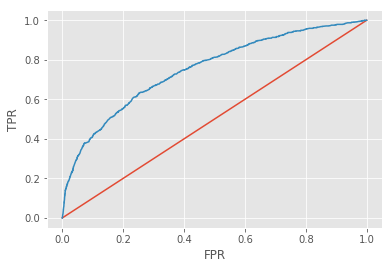

In [103]:
fpr, tpr, threshold = roc_curve(y_test, final_pred)
roc_auc_final_mean = auc(fpr, tpr)
    

plt.figure()
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
    
roc_auc_final_mean

The ensemble of the models did improve the performance. 

In [104]:
#cost analysis
#loose one customer is 5 and making one call the cost is 3
#False negative means losing customer, calculating false negative rate by 1-tpr
#False negative means making calls but not getting customers
min_cost = 1e10
min_index = 0
for i in range (len(threshold)):
    cost = 5*(1-tpr[i]) + 3*fpr[i]
    if cost < min_cost:
        min_cost = cost
        min_index=i

threshold[min_index]

0.3687342967660099

In [105]:
y_predic_final_after_cost_evaluation = []
for num in final_pred:
    if num >= 0.3687342967660099:
        y_predic_final_after_cost_evaluation.append(1)
    else:
        y_predic_final_after_cost_evaluation.append(0)
y_predic_final_after_cost_evaluation

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,


In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [108]:
f1_score_final_after_cost_analysis = f1_score(y_test, y_predic_final_after_cost_evaluation)
recal_final_after_cost_analysis = recall_score(y_test, y_predic_final_after_cost_evaluation)
precision_final_after_cost_analysis = precision_score(y_test, y_predic_final_after_cost_evaluation)


In [109]:
f1_score_final_after_cost_analysis

0.2987861811391223

In [110]:
recal_final_after_cost_analysis

0.796812749003984

In [111]:
precision_final_after_cost_analysis

0.1838657779820731